In [128]:
pip install fastf1 fastapi uvicorn pandas scikit-learn

In [129]:
import fastf1
fastf1.Cache.enable_cache('cache')
session = fastf1.get_session(2023, 'Bahrain', 'R')
session.load()
results = session.results
results.head()

logger      WARNING 	Failed to load schedule from FastF1 backend!
logger        DEBUG 	Traceback for failure in FastF1 schedule
Traceback (most recent call last):
  File "C:\Users\zahee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fastf1\logger.py", line 151, in __wrapped
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\zahee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fastf1\events.py", line 584, in _get_schedule_ff1
    response = Cache.requests_get(
               ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\zahee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fastf1\req.py", line 303, in requests_get
    return cls._cached_request('GET', url, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\zah

ValueError: Failed to load any schedule data.

In [ ]:
results.to_csv('bahrain_2023_results.csv', index=False)

Step 1: Loading the race results data
In this step, I loaded the Bahrain 2023 Formula 1 race results from a CSV file into a pandas DataFrame. This allows me to easily explore and analyze the data using Python.

In [ ]:
import pandas as pd
results_df = pd.read_csv('bahrain_2023_results.csv')

Step 2: Taking a first look at the data
Here, I used the .head() function to display the first few rows of the DataFrame. This helps me understand what columns are available and what the data looks like.

In [ ]:
results_df.head(10)

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
0,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671C6,red_bull,Max,Verstappen,Max Verstappen,...,NED,1.0,1,1.0,NaN,NaN,NaN,0 days 01:33:56.736000,Finished,25.0
1,11,S PEREZ,PER,perez,Red Bull Racing,3671C6,red_bull,Sergio,Perez,Sergio Perez,...,MEX,2.0,2,2.0,NaN,NaN,NaN,0 days 00:00:11.987000,Finished,18.0
2,14,F ALONSO,ALO,alonso,Aston Martin,358C75,aston_martin,Fernando,Alonso,Fernando Alonso,...,ESP,3.0,3,5.0,NaN,NaN,NaN,0 days 00:00:38.637000,Finished,15.0
3,55,C SAINZ,SAI,sainz,Ferrari,F91536,ferrari,Carlos,Sainz,Carlos Sainz,...,ESP,4.0,4,4.0,NaN,NaN,NaN,0 days 00:00:48.052000,Finished,12.0
4,44,L HAMILTON,HAM,hamilton,Mercedes,6CD3BF,mercedes,Lewis,Hamilton,Lewis Hamilton,...,GBR,5.0,5,7.0,NaN,NaN,NaN,0 days 00:00:50.977000,Finished,10.0
5,18,L STROLL,STR,stroll,Aston Martin,358C75,aston_martin,Lance,Stroll,Lance Stroll,...,CAN,6.0,6,8.0,NaN,NaN,NaN,0 days 00:00:54.502000,Finished,8.0
6,63,G RUSSELL,RUS,russell,Mercedes,6CD3BF,mercedes,George,Russell,George Russell,...,GBR,7.0,7,6.0,NaN,NaN,NaN,0 days 00:00:55.873000,Finished,6.0
7,77,V BOTTAS,BOT,bottas,Alfa Romeo,C92D4B,alfa,Valtteri,Bottas,Valtteri Bottas,...,FIN,8.0,8,12.0,NaN,NaN,NaN,0 days 00:01:12.647000,Finished,4.0
8,10,P GASLY,GAS,gasly,Alpine,2293D1,alpine,Pierre,Gasly,Pierre Gasly,...,FRA,9.0,9,20.0,NaN,NaN,NaN,0 days 00:01:13.753000,Finished,2.0
9,23,A ALBON,ALB,albon,Williams,37BEDD,williams,Alexander,Albon,Alexander Albon,...,THA,10.0,10,15.0,NaN,NaN,NaN,0 days 00:01:29.774000,Finished,1.0


Step 4: Getting basic statistics
Using the .describe() function, I generated summary statistics for the numerical columns in the dataset. This gives me a quick overview of the range, mean, and spread of values like positions and points.

In [ ]:
results_df.describe()

,DriverNumber,Position,GridPosition,Q1,Q2,Q3,Points
count,20.000000,20.00000,20.00000,0.0,0.0,0.0,20.000000
mean,28.200000,10.50000,10.50000,NaN,NaN,NaN,5.050000
std,23.678994,5.91608,5.91608,NaN,NaN,NaN,7.359026
min,1.000000,1.00000,1.00000,NaN,NaN,NaN,0.000000
25%,13.250000,5.75000,5.75000,NaN,NaN,NaN,0.000000
50%,21.500000,10.50000,10.50000,NaN,NaN,NaN,0.500000
75%,34.250000,15.25000,15.25000,NaN,NaN,NaN,8.500000
max,81.000000,20.00000,20.00000,NaN,NaN,NaN,25.000000


Step 3: Checking for missing values
I checked if there are any missing values (NaN) in the dataset. Missing data can cause problems for analysis or machine learning, so it’s important to know if any columns need cleaning or special handling.

In [ ]:
results_df.isnull().sum()

DriverNumber           0
BroadcastName          0
Abbreviation           0
DriverId               0
TeamName               0
TeamColor              0
TeamId                 0
FirstName              0
LastName               0
FullName               0
HeadshotUrl            0
CountryCode            0
Position               0
ClassifiedPosition     0
GridPosition           0
Q1                    20
Q2                    20
Q3                    20
Time                   3
Status                 0
Points                 0
dtype: int64

Step 5: Finding the race winner
I filtered the DataFrame to find the driver who finished in first place. This gives me the winner’s name, team, starting grid position, and points scored in this race.

In [ ]:
winner = results_df[results_df['Position'] == 1.0]
print(winner[['FullName', 'TeamName', 'GridPosition', 'Points']])

         FullName         TeamName  GridPosition  Points
0  Max Verstappen  Red Bull Racing           1.0    25.0


Exploring Key F1 Race Features
Step 6: Visualizing Important Race Features
To better understand the Bahrain 2023 race data, I plotted the distributions of three key features: grid positions, finishing positions, and points scored. These visualizations help me see how drivers started, finished, and how points were distributed in this race.

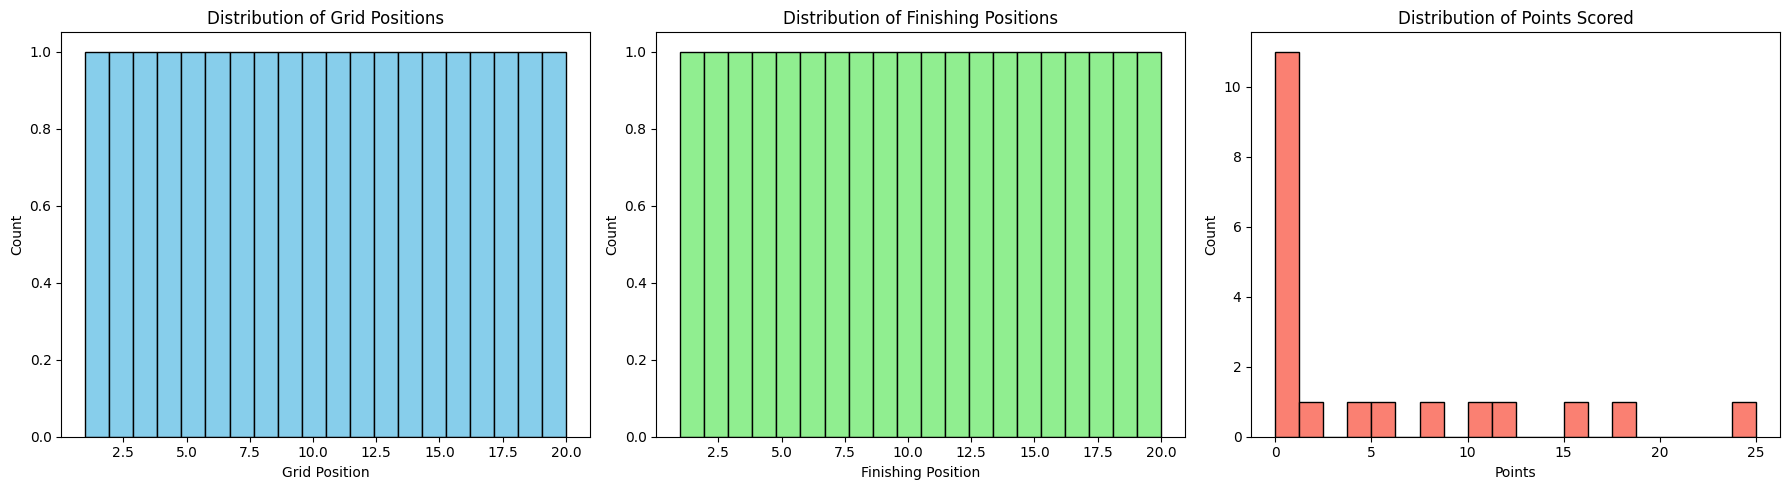

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))

#Distribution of Grid Positions
#This plot shows the starting positions of all drivers on the grid. 
#Since each grid position is unique for a race, the distribution is flat, with each position (1 to 20) appearing once. 
#This makes sense because there are 20 drivers and each starts from a different spot.
plt.subplot(1, 3, 1)
plt.hist(results_df['GridPosition'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Grid Position')
plt.ylabel('Count')
plt.title('Distribution of Grid Positions')

#Distribution of Finishing Positions
#This plot displays where each driver finished the race. 
#Like the grid positions, each finishing position is unique for a single race, so the distribution is also flat. 
#In a full season or multiple races, we would expect to see more variation.
plt.subplot(1, 3, 2)
plt.hist(results_df['Position'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Finishing Position')
plt.ylabel('Count')
plt.title('Distribution of Finishing Positions')

#Distribution of Points Scored
#This plot shows how many points each driver earned in the race. 
#Most drivers scored 0 points, while only the top 10 finishers earned points. 
#The winner received the highest (25 points), and the rest received fewer points according to the F1 scoring system.
plt.subplot(1, 3, 3)
plt.hist(results_df['Points'], bins=20, color='salmon', edgecolor='black')
plt.xlabel('Points')
plt.ylabel('Count')
plt.title('Distribution of Points Scored')

plt.tight_layout()
plt.show()

Step 7: Does Starting Position Matter?
In this step, I’m exploring whether starting closer to the front of the grid helps a driver score more points. The scatter plot below shows each driver’s starting position (on the x-axis) and the points they scored (on the y-axis). If there’s a downward trend (higher points for lower grid positions), it means qualifying well is important for success in the race.

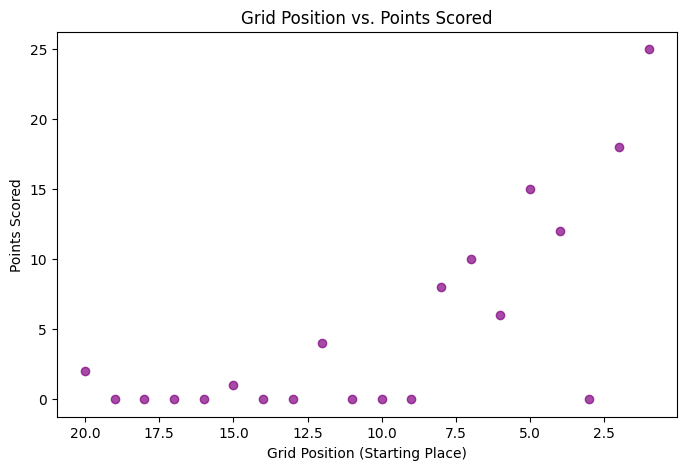

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(results_df['GridPosition'], results_df['Points'], color='purple', alpha=0.7)
plt.xlabel('Grid Position (Starting Place)')
plt.ylabel('Points Scored')
plt.title('Grid Position vs. Points Scored')
plt.gca().invert_xaxis()  # So pole position (1) is on the left
plt.show()

Insight:
This plot shows a clear trend: drivers who start closer to the front (lower grid position) are much more likely to score points. The winner (pole position) always gets the most points, and there’s a steep drop-off as you move back on the grid. There are a few cases where drivers outside the top 10 scored points, which could be due to strong race pace or incidents affecting those ahead.

Grid Position vs. Finishing Position
This plot shows how drivers’ starting positions relate to where they finished.

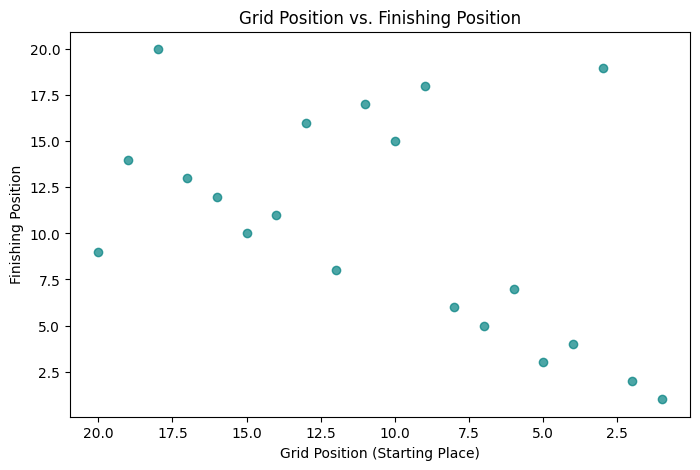

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(results_df['GridPosition'], results_df['Position'], color='teal', alpha=0.7)
plt.xlabel('Grid Position (Starting Place)')
plt.ylabel('Finishing Position')
plt.title('Grid Position vs. Finishing Position')
plt.gca().invert_xaxis()  # Pole on the left
plt.show()

Insight:
There’s a strong diagonal trend, meaning most drivers finish close to where they started. However, some drivers improved or lost positions, which could be interesting to analyze further (e.g., who gained the most places?).

Points Scored by Team
This bar plot shows which teams scored the most points in the Bahrain 2023 GP. It helps identify top-performing teams and those that struggled.

C:\Users\zahee\AppData\Local\Temp\ipykernel_1240\866137370.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='TeamName', y='Points', data=results_df, estimator=sum, ci=None)


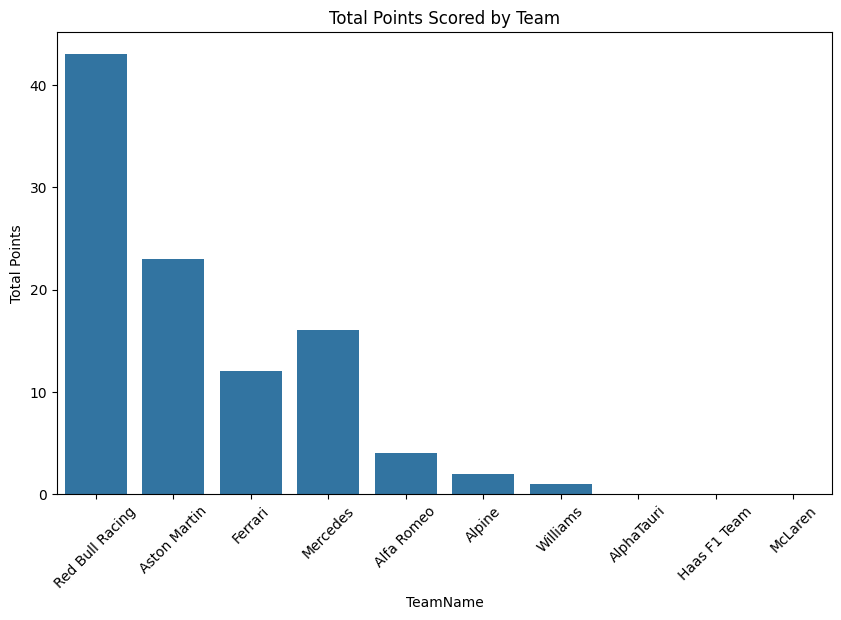

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x='TeamName', y='Points', data=results_df, estimator=sum, ci=None)
plt.xticks(rotation=45)
plt.ylabel('Total Points')
plt.title('Total Points Scored by Team')
plt.show()

Insight:
Red Bull Racing dominated this race, scoring nearly double the points of the next-best team (Aston Martin). This reflects both strong car performance and driver skill. Teams at the bottom scored little or no points, showing a clear performance gap.

Distribution of Finishing Positions
This histogram shows how finishing positions were distributed among all drivers in the race.

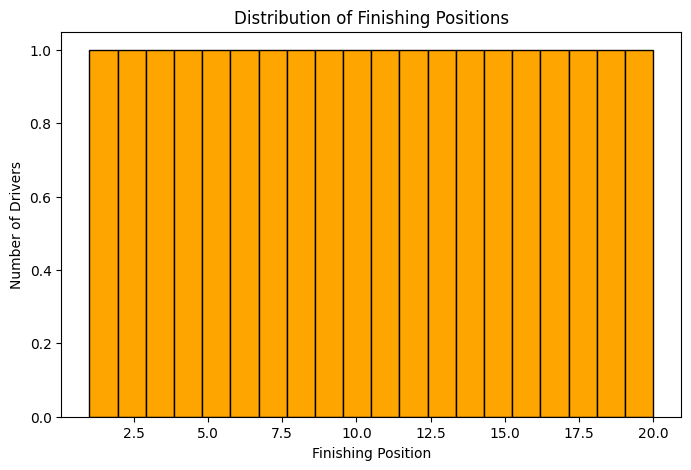

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(results_df['Position'], bins=20, color='orange', edgecolor='black')
plt.xlabel('Finishing Position')
plt.ylabel('Number of Drivers')
plt.title('Distribution of Finishing Positions')
plt.show()

Insight:
Each finishing position is unique for a single race, so this plot is flat.

Race Progression / Position Change
Feature: Position Change = GridPosition - Position
Plot: Bar plot of position changes for each driver.
Why: Shows who gained or lost the most places during the race.

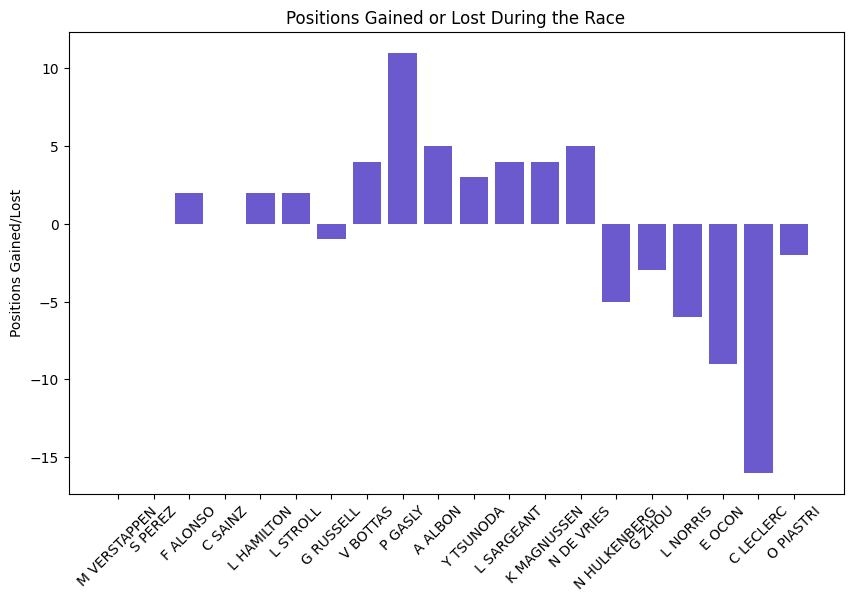

In [ ]:
results_df['PositionChange'] = results_df['GridPosition'] - results_df['Position']
plt.figure(figsize=(10,6))
plt.bar(results_df['BroadcastName'], results_df['PositionChange'], color='slateblue')
plt.xticks(rotation=45)
plt.ylabel('Positions Gained/Lost')
plt.title('Positions Gained or Lost During the Race')
plt.show()

This plot shows which drivers gained or lost the most positions during the race. 
Positive values mean the driver finished ahead of their starting spot, while negative values mean they lost places.

Retirements and DNFs
Feature: Status column (e.g., "Finished", "Lapped", "Retired")
Plot: Count of each status.
Why: Helps understand reliability and race incidents.

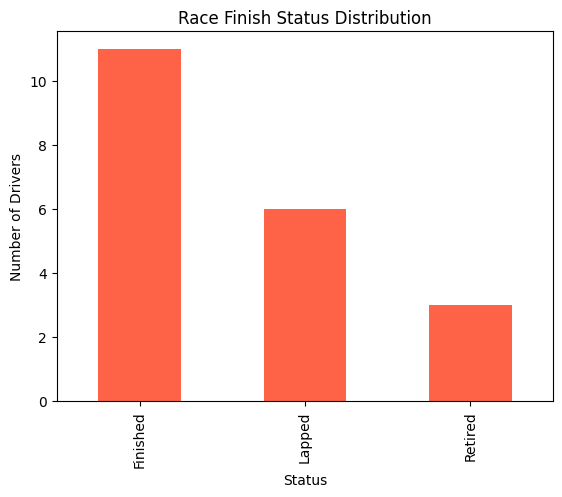

In [ ]:
results_df['Status'].value_counts().plot(kind='bar', color='tomato')
plt.ylabel('Number of Drivers')
plt.title('Race Finish Status Distribution')
plt.show()

This bar chart shows how many drivers finished, were lapped, or retired. Retirements can impact team and driver points.

Team-wise Average Grid and Finish Positions
Why: Shows which teams consistently qualify and finish well.

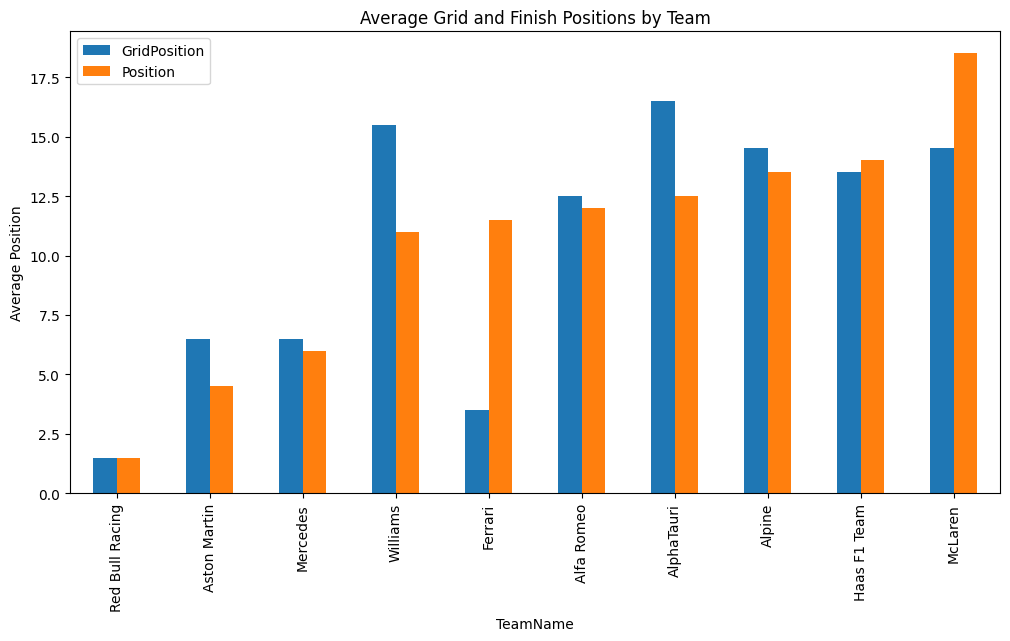

In [ ]:
team_summary = results_df.groupby('TeamName')[['GridPosition','Position']].mean().sort_values('Position')
team_summary.plot(kind='bar', figsize=(12,6))
plt.ylabel('Average Position')
plt.title('Average Grid and Finish Positions by Team')
plt.show()

This plot compares the average starting and finishing positions for each team, highlighting which teams are most consistent and which improve (or drop) during the race.

In [ ]:
#Position Change: How many places gained/lost
results_df['PositionChange'] = results_df['GridPosition'] - results_df['Position']

#Finished Flag: 1 if finished, 0 if not
results_df['Finished'] = results_df['Status'].apply(lambda x: 1 if x == 'Finished' else 0)

#Points Flag: 1 if scored points, 0 otherwise
results_df['ScoredPoints'] = results_df['Points'].apply(lambda x: 1 if x > 0 else 0)

Goal: For winner prediction, I'm creating a binary column: Winner (1 if Position == 1, else 0)

In [132]:
results_df['Winner'] = results_df['Position'].apply(lambda x: 1 if x == 1 else 0)

In [ ]:
import pandas as pd
import fastf1

#fastf1.Cache.clear_cache()
#fastf1.set_log_level('DEBUG')

races = [
    (2025, 'Bahrain'),
    (2024, 'Bahrain'),
    (2023, 'Bahrain'),
    (2025, 'Saudi Arabia'),
    (2024, 'Saudi Arabia'),
    (2023, 'Saudi Arabia'),
    (2025, 'Australia'),
    (2024, 'Australia'),
    (2023, 'Australia'),
    (2025, 'Azerbaijan'),
    (2024, 'Azerbaijan'),
    (2023, 'Azerbaijan'),
    (2025, 'Miami'),
    (2024, 'Miami'),
    (2023, 'Miami'),
    (2025, 'China'),
    (2024, 'China'),
    (2023, 'China'),
    (2025, 'Japan'),
    (2024, 'Japan'),
    (2023, 'Japan'),
    (2025, 'Italy'),
    (2024, 'Italy'),
    (2023, 'Italy'),
    (2025, 'Monaco'),
    (2024, 'Monaco'),
    (2023, 'Monaco'),
    (2025, 'Spain'),
    (2024, 'Spain'),
    (2023, 'Spain'),
    (2025, 'Canada'),
    (2024, 'Canada'),
    (2023, 'Canada'),
    (2025, 'Austria'),
    (2024, 'Austria'),
    (2023, 'Austria'),
    (2025, 'United Kingdom'),
    (2024, 'United Kingdom'),
    (2023, 'United Kingdom'),
    (2025, 'Belgium'),
    (2024, 'Belgium'),
    (2023, 'Belgium'),
    (2025, 'Hungary'),
    (2024, 'Hungary'),
    (2023, 'Hungary'),
    (2025, 'Netherlands'),
    (2024, 'Netherlands'),
    (2023, 'Netherlands'),
    (2025, 'Singapore'),
    (2024, 'Singapore'),
    (2023, 'Singapore'),
    (2025, 'USA'),
    (2024, 'USA'),
    (2023, 'USA'),
    (2025, 'Mexico'),
    (2024, 'Mexico'),
    (2023, 'Mexico'),
    (2025, 'Brazil'),
    (2024, 'Brazil'),
    (2023, 'Brazil'),
    (2025, 'Las Vegas'),
    (2024, 'Las Vegas'),
    (2023, 'Las Vegas'),
    (2025, 'Qatar'),
    (2024, 'Qatar'),
    (2023, 'Qatar'),
    (2025, 'Abu Dhabi'),
    (2024, 'Abu Dhabi'),
    (2023, 'Abu Dhabi')
]


all_races = []

for year, gp in races:
    session = fastf1.get_session(year, gp, 'R')
    session.load()
    time.sleep(5)  # Adding a delay to avoid hitting API limits
    df = session.results
    df['Race'] = f"{gp} {year}"
    all_races.append(df)

# Combining all races into one DataFrame
full_df = pd.concat(all_races, ignore_index=True)

logger      WARNING 	Failed to load schedule from FastF1 backend!
logger        DEBUG 	Traceback for failure in FastF1 schedule
Traceback (most recent call last):
  File "C:\Users\zahee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fastf1\logger.py", line 151, in __wrapped
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\zahee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fastf1\events.py", line 584, in _get_schedule_ff1
    response = Cache.requests_get(
               ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\zahee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fastf1\req.py", line 303, in requests_get
    return cls._cached_request('GET', url, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\zah

ValueError: Failed to load any schedule data.

In [ ]:
#Ensuring Position is float (it may be string or float)
full_df['Position'] = full_df['Position'].astype(float)

#Creating Winner column: 1 if Position == 1.0, else 0
full_df['Winner'] = full_df['Position'].apply(lambda x: 1 if x == 1.0 else 0)

#Checking if we have a winner per race
print(full_df.groupby('Race')['Winner'].sum())
print(full_df['Winner'].value_counts())

Race
Australia 2023       1
Australia 2024       1
Australia 2025       0
Azerbaijan 2023      0
Azerbaijan 2024      0
Bahrain 2023         1
Bahrain 2024         1
Bahrain 2025         0
Miami 2023           0
Miami 2024           0
Saudi Arabia 2023    1
Saudi Arabia 2024    1
Name: Winner, dtype: int64
Winner
0    233
1      6
Name: count, dtype: int64


In [ ]:
# Filtering out races where there is no winner
races_with_winner = full_df.groupby('Race')['Winner'].sum()
valid_races = races_with_winner[races_with_winner == 1].index
full_df_cleaned = full_df[full_df['Race'].isin(valid_races)].reset_index(drop=True)

# Checking that all remaining races have a winner
print(full_df_cleaned.groupby('Race')['Winner'].sum())
print(full_df_cleaned['Winner'].value_counts())

Race
Australia 2023       1
Australia 2024       1
Bahrain 2023         1
Bahrain 2024         1
Saudi Arabia 2023    1
Saudi Arabia 2024    1
Name: Winner, dtype: int64
Winner
0    113
1      6
Name: count, dtype: int64


In [ ]:
if 'PositionChange' not in full_df_cleaned.columns:
    full_df_cleaned['PositionChange'] = full_df_cleaned['GridPosition'] - full_df_cleaned['Position']

if 'Finished' not in full_df_cleaned.columns:
    full_df_cleaned['Finished'] = full_df_cleaned['Status'].apply(lambda x: 1 if x == 'Finished' else 0)

In [ ]:
full_df_cleaned['Podium'] = full_df_cleaned['Position'].apply(lambda x: 1 if x <= 3 else 0)

full_df_cleaned['PointsFinisher'] = full_df_cleaned['Points'].apply(lambda x: 1 if x > 0 else 0)

print(full_df_cleaned['Podium'].value_counts())
print(full_df_cleaned['PointsFinisher'].value_counts())

Podium
0    101
1     18
Name: count, dtype: int64
PointsFinisher
1    60
0    59
Name: count, dtype: int64


In [ ]:
y = full_df_cleaned['Podium'].reset_index(drop=True)
#y = full_df_cleaned['PointsFinisher'].reset_index(drop=True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['TeamName']
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(full_df_cleaned[categorical_cols])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_cols))

numerical_df = full_df_cleaned[['GridPosition', 'PositionChange', 'Finished']].reset_index(drop=True)
X = pd.concat([numerical_df, encoded_df], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [133]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  0]
 [ 0  4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00         4

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24

